# Error Analysis

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt

## Load test set and predictions of best model

In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
%cp --verbose -R "/content/drive/MyDrive/Quora/Dataset/test.csv" "/content/"
%cp --verbose -R "/content/drive/MyDrive/Quora/Predictions/final_ensemble_pred.npy" "/content/"

'/content/drive/MyDrive/Quora/Dataset/test.csv' -> '/content/test.csv'
'/content/drive/MyDrive/Quora/Predictions/final_ensemble_pred.npy' -> '/content/final_ensemble_pred.npy'


In [6]:
with open('/content/final_ensemble_pred.npy', 'rb') as f:
  preds = np.load(f)
preds.shape

(40428, 1)

In [7]:
test_questions = pd.read_csv('/content/test.csv')
test_questions

,id,qid1,qid2,question1,question2,is_duplicate
0,231251,158987,65612,How will scraping currency notes of INR 500 an...,How is scrapping of Rs 500 and Rs 1000 currenc...,1
1,226528,335164,335165,Why do the coated lens look purple by reflecte...,Why do coated lenses look purple when reflecti...,1
2,36038,65760,65761,How safe is the Oracle Arena?,"In Oracle Arena: Would Seat ""1"" in Section 128...",0
3,234195,34326,344637,How can I improve me problem solving skills?,What is the best way to practice problem solvi...,0
4,121299,196582,196583,Could I have more than one account on Pinteres...,I have two account and forgot the email for th...,0
...,...,...,...,...,...,...
40423,210958,24331,315662,What are the landmark judgements of the Suprem...,What are some of the best judgements passed by...,1
40424,347284,450778,475744,How did Snapchat initially fund itself?,How did Shoply gain its initial traction?,0
40425,341397,469216,469217,Can I give my dog Benadryl to help him calm down?,Can I give Benadryl to help my baby sleep?,0
40426,355618,484863,484864,What are the differences between constant acce...,What is the difference between a body travelin...,0


## Study errors

In [8]:
errors = []
for i in range(len(preds)):
  if preds[i][0] != test_questions['is_duplicate'][i]:
    errors.append([test_questions['question1'][i], test_questions['question2'][i], test_questions['is_duplicate'][i]])
len(errors)

4531

In [12]:
df_errors = pd.DataFrame(errors, columns = ['question1', 'question2', 'is_duplicate'])
df_errors

,question1,question2,is_duplicate
0,How can I improve me problem solving skills?,What is the best way to practice problem solvi...,0
1,What would happen to the Earth if the sun rota...,What would happen if Earth started to rotate i...,0
2,What is the scariest thing you have experience...,What is the scariest site on the internet?,0
3,Why does my dog scratch her bowl?,Why does my dog tip his bowl over?,0
4,Sincere curiosity; why would an intelligent an...,Why would an intelligent person vote for Donal...,1
...,...,...,...
4526,How should I study for the reading and writing...,How should I study to get a 800 on the reading...,0
4527,What are some careers that combine engineering...,What are some jobs that combine engineering an...,0
4528,How do billionaires buy things?,What do billionaires buy?,0
4529,How do I make bacon pancakes?,What's the best way to make a bacon pancake?,1


In [15]:
df_errors[df_errors['question1'] == "How do I get in Harvard?"]

,question1,question2,is_duplicate


In [ ]:
question1 = list(df_errors['question1'].values)
question2 = list(df_errors['question1'].values)
misclassified_questions = []
misclassified_questions.extend(question1)
misclassified_questions.extend(question2)
df_misclassified_questions = pd.DataFrame(misclassified_questions, columns=['question'])
df_counts = df_misclassified_questions.groupby('question').size().reset_index(name='counts')
df_counts

,question,counts
0,A compound has the molecular formula XeOn wher...,2
1,"A photon leaves the sun, bounces off a leaf, t...",2
2,About my relationship .want to solve problems?,2
3,Academic and Educational Advice: What can I do...,2
4,"After Jayalalithaa's death, who will be the ne...",2
...,...,...
4494,Would social media have helped Steve Bartman?,2
4495,Would the NJAC Bill 2014 bring any change to r...,2
4496,Would you kill your new born sibling for 10 mi...,2
4497,Wwe is real fight?,2


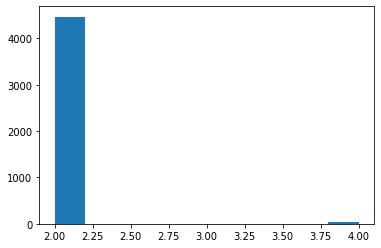

In [ ]:
counts = df_counts['counts'].values
plt.hist(counts)
plt.show()

In [ ]:
np.sum(counts == 2)

4467

### Duplicates class

Pairs of questions that are duplicate, but have not been classified as such

In [ ]:
duplicates_errors = [[error[0], error[1]] for error in errors if error[2] == 1]
len(duplicates_errors)

1923

In [ ]:
duplicates_errors

[['Sincere curiosity; why would an intelligent and decent person who loves America want Donald Trump for president?',
  'Why would an intelligent person vote for Donald Trump?'],
 ["How do I get the person's name if I got the account number?",
  "Can I get the owner's name from an account number?"],
 ['I am an armature photographer. What are the good photography tutorial sites?',
  'Can you recommend good photography tutorials?'],
 ['Why songs and music is forbidden In Islam?',
  'Is this music is allowed in Islam?'],
 ['How do I become the best software engineer in the world?',
  'Who are the best software engineers in the world?'],
 ['Is torrentz.eu down too?', 'Is torrentz.eu is shutting down in India?'],
 ['What should I do if I have purple fingernails?',
  'Purple nails, what can it be about?'],
 ['How is Alchemist, Delhi for CAT coaching?',
  'How good is Alchemist CAT coaching?'],
 ['What function does the cell or plasma membrane serve?',
  'What is the structure of the cell mem

In [ ]:
rn.seed(1234)
isolated_duplicates = rn.sample(duplicates_errors, 30)
df_duplicates = pd.DataFrame(isolated_duplicates, columns =['question1', 'question2'])
df_duplicates

,question1,question2
0,What are some of the the best lines from MS Dh...,What are the best dialogues of the movie MS Dh...
1,Why would everyone deserve a second chance?,Does everyone deserve a second chance?
2,Why did the United States buy Alaska in 1868?,Why did the US buy Alaska from Russia?
3,"In physics, is stress the same as pressure?",What is stress in physics?
4,Why do people hate Islam?,Why do some people only hate Islam and not oth...
5,Is there a term for someone who belongs to mul...,What is someone who practices multiple religio...
6,How often is it sunny in Philadelphia?,Is it always sunny in Philadelphia?
7,"After Jayalalithaa's death, who will be the ne...",Who is the next chief minister of Tamil Nadu?
8,How do I gain weight in 10 days?,How can I gain weight in 7 days?
9,Can I have java 6 and java 8 on the same machi...,How do I run java 6 & java 8 on the same Machi...


### Not duplicates class

Pairs of questions that are not duplicated, but have been classified as such

In [ ]:
not_duplicates_errors = [[error[0], error[1]] for error in errors if error[2] == 0]
len(not_duplicates_errors)

2608

In [ ]:
not_duplicates_errors

[['How can I improve me problem solving skills?',
  'What is the best way to practice problem solving skills?'],
 ['What would happen to the Earth if the sun rotated in the opposite direction?',
  'What would happen if Earth started to rotate in the opposite direction?'],
 ['What is the scariest thing you have experienced on the internet?',
  'What is the scariest site on the internet?'],
 ['Why does my dog scratch her bowl?', 'Why does my dog tip his bowl over?'],
 ['How would you spend your last 24 hours that you had to live?',
  'If you only had one year to live what would you do?'],
 ['Which is the best car to buy under Rs 10 lakh?',
  'Which car should I buy within 10 lakhs?'],
 ['What are the most hopeful candidates for a propulsion system/method which would allow interstellar travel?',
  'What forms of propulsion offer the most promise for Interstellar spaceflight?'],
 ['How do I cope with losing my best friend?',
  'How do you get over losing a best friend?'],
 ['Where can I ge

In [ ]:
rn.seed(12345)
isolated_not_duplicates = rn.sample(not_duplicates_errors, 40)
df_not_duplicates = pd.DataFrame(isolated_not_duplicates, columns =['question1', 'question2'])
df_not_duplicates

,question1,question2
0,How do I start YouTube channel to earn money?,How do I start YouTube channel and earn money ...
1,Which are the best IIT JEE coaching classes in...,Which are the best online IIT JEE coaching?
2,How do I convert a PDF to a Word document?,How can I convert a PDF to Word?
3,What's the fastest way to learn Chinese charac...,What is the most effective way to learn Chines...
4,What are the allegations that Arvind Kejriwal ...,How many allegations has Arvind Kejriwal made ...
5,What causes hair loss for men?,What are the causes of hair loss?
6,What is the material used in making new 2000 R...,Is the multi-lingual panel on the new 500 and ...
7,What is one thing you would never change about...,If there is one thing you could change about y...
8,Which is the best CAT coaching centre in chennai?,Which is the best coaching centre for CAT in C...
9,Was General George S. Patton the best general ...,Was General George Patton the greatest general...
